# Manifold Learning: S-curve and Swiss Roll

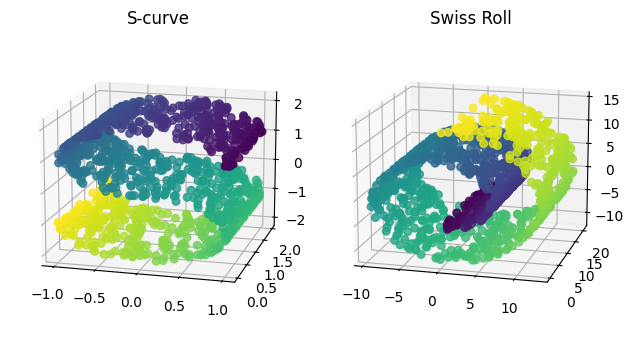

In [1]:
import matplotlib.pyplot as plt
from matplotlib import ticker
from sklearn import manifold, datasets

# Reference: https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html

def plot_3d(p1, col1, p2, col2):
    x1, y1, z1 = p1.T
    x2, y2, z2 = p2.T

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                                   tight_layout=True,
                                   subplot_kw={"projection": "3d"})
    ax1.scatter(x1, y1, z1, c=col1, s=30, alpha=0.8)
    ax1.view_init(azim=-75, elev=15)
    ax1.set_title('S-curve')
    ax2.scatter(x2, y2, z2, c=col2, s=30, alpha=0.8)
    ax2.view_init(azim=-75, elev=15)
    ax2.set_title('Swiss Roll')
    plt.show()
    
def plot_2d(p1, col1, p2, col2, title):
    x1, y1 = p1.T
    x2, y2 = p2.T
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                                   facecolor="white", 
                                   constrained_layout=True)
    ax1.scatter(x1, y1, c=col1, s=30, alpha=0.8)
    ax1.set_title('S-curve: '+title, size=10)
    ax2.scatter(x2, y2, c=col2, s=30, alpha=0.8)
    ax2.set_title('Swiss Roll: '+title, size=10)
    fig.set_figheight(3)
    plt.show()
    
S_points, S_color = datasets.make_s_curve(1200, random_state=0)
R_points, R_color = datasets.make_swiss_roll(1200, random_state=0)
plot_3d(S_points, S_color, R_points, R_color)

## Locally Linear Embedding

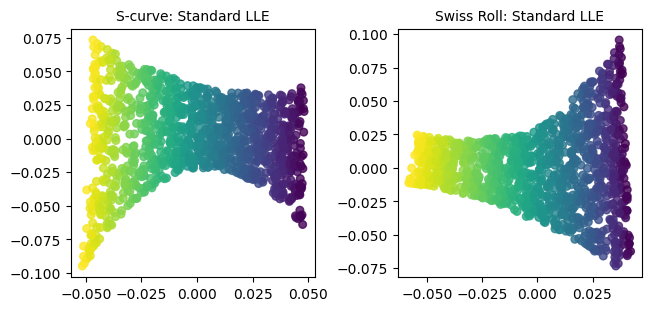

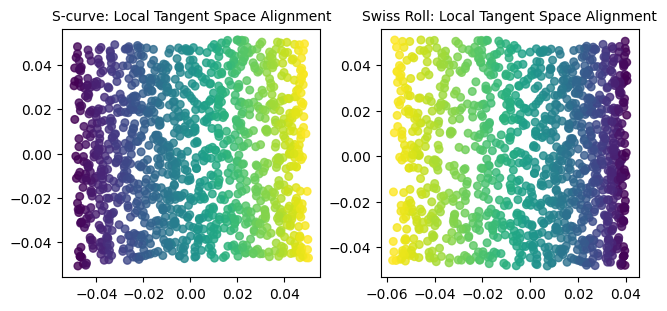

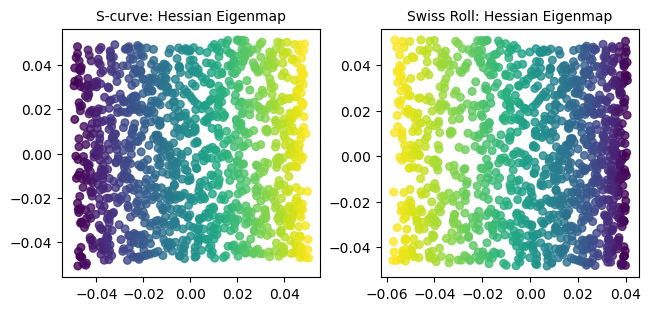

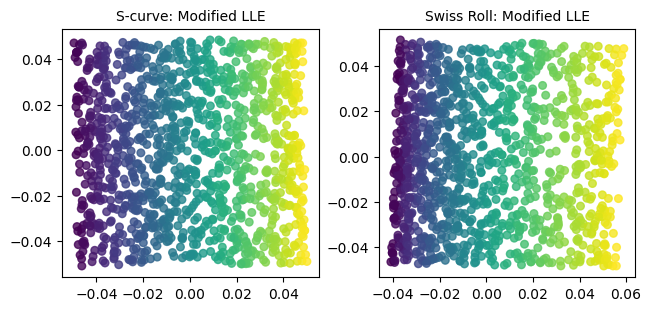

In [2]:
params = {
    "n_neighbors": 12,
    "n_components": 2,
    "eigen_solver": "auto",
    "random_state": 0,
}

lle_standard = manifold.LocallyLinearEmbedding(method="standard", **params)
S_standard = lle_standard.fit_transform(S_points)
R_standard = lle_standard.fit_transform(R_points)
plot_2d(S_standard, S_color, R_standard, R_color, 'Standard LLE') 

lle_ltsa = manifold.LocallyLinearEmbedding(method="ltsa", **params)
S_ltsa = lle_ltsa.fit_transform(S_points)
R_ltsa = lle_ltsa.fit_transform(R_points)
plot_2d(S_ltsa, S_color, R_ltsa, R_color, 'Local Tangent Space Alignment') 

lle_hessian = manifold.LocallyLinearEmbedding(method="hessian", **params)
S_hessian = lle_hessian.fit_transform(S_points)
R_hessian = lle_hessian.fit_transform(R_points)
plot_2d(S_hessian, S_color, R_hessian, R_color, 'Hessian Eigenmap') 

lle_mod = manifold.LocallyLinearEmbedding(method="modified", **params)
S_mod = lle_mod.fit_transform(S_points)
R_mod = lle_mod.fit_transform(R_points)
plot_2d(S_mod, S_color, R_mod, R_color, 'Modified LLE') 

## Laplacian Eigenmap, Isomap, MDS, and t-SNE
Note: MDS and t-SNE take a bit more time.

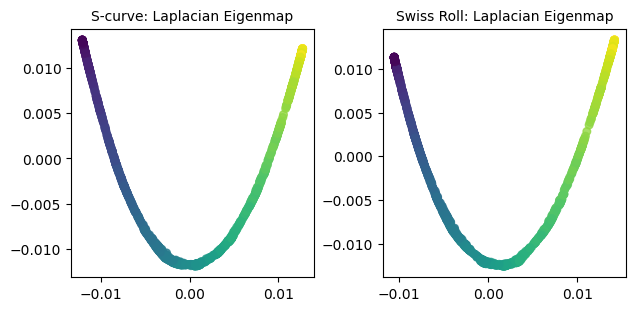

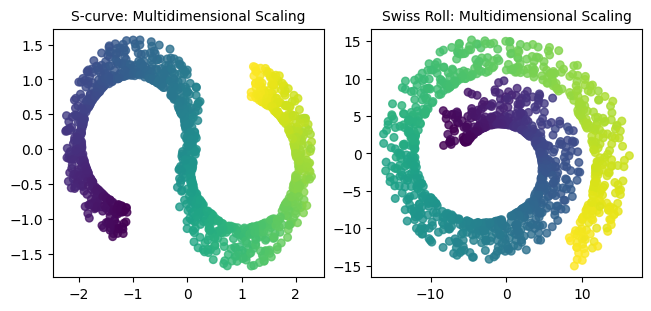

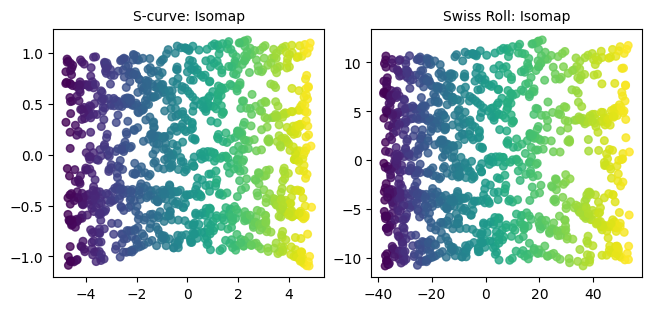

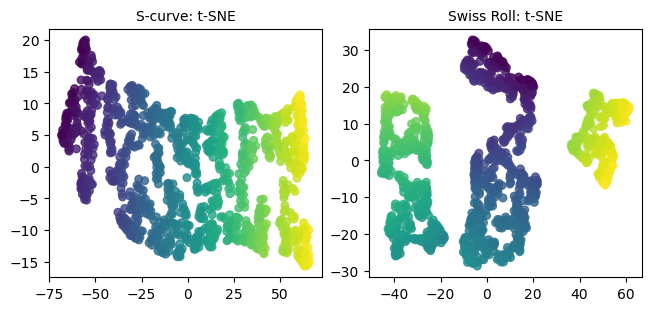

In [3]:
spec = manifold.SpectralEmbedding(n_neighbors=12, n_components=2)
S_spec = spec.fit_transform(S_points)
R_spec = spec.fit_transform(R_points)
plot_2d(S_spec, S_color, R_spec, R_color, 'Laplacian Eigenmap') 

mds = manifold.MDS(metric=True,normalized_stress='auto')
S_mds = mds.fit_transform(S_points)
R_mds = mds.fit_transform(R_points)
plot_2d(S_mds, S_color, R_mds, R_color, 'Multidimensional Scaling') 

iso = manifold.Isomap(n_neighbors=12, n_components=2)
S_iso = iso.fit_transform(S_points)
R_iso = iso.fit_transform(R_points)
plot_2d(S_iso, S_color, R_iso, R_color, 'Isomap') 

tsne = manifold.TSNE()
S_tsne = tsne.fit_transform(S_points)
R_tsne = tsne.fit_transform(R_points)
plot_2d(S_tsne, S_color, R_tsne, R_color, 't-SNE') 

## PCA and Kernel PCA

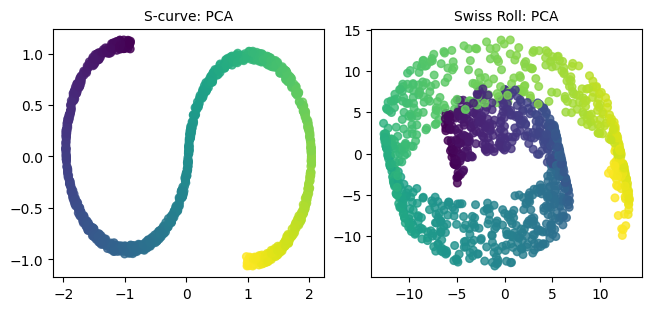

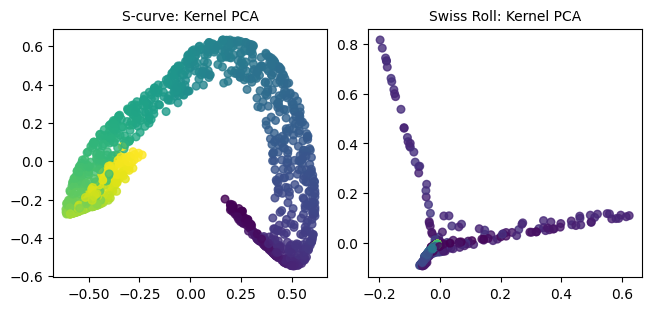

In [4]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2)
S_pca = pca.fit_transform(S_points)
R_pca = pca.fit_transform(R_points)
plot_2d(S_pca, S_color, R_pca, R_color, 'PCA') 

kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.5)
S_kpca = kpca.fit_transform(S_points)
R_kpca = kpca.fit_transform(R_points)
plot_2d(S_kpca, S_color, R_kpca, R_color, 'Kernel PCA')

This code shows that for learning low-dimensional nonlinear manifolds such as the S-curve and Swiss Roll data sets, PCA and Kernel PCA performs poorer than the manifold learning algorithms. To learn the manifold correctly, the low-dimensional mapping should unfold the structure embedded in high dimensions, i.e. it should become easier to use straight lines to separate different colored samples in the 2-D mapping. In the examples above, Isomap, LLE, and t-SNE were able to do this very well. In contrast, the PCA result for the Swiss Roll data set has overlapping samples from opposite ends of the manifold, which makes it hard to separate them by a straight line. Kernel PCA even performs worse in the same data set.

For the Swiss Roll data set, t-SNE produced disjoint clusters in the 2-D mapping. t-SNE is more suitable for finding multiple disjoint manifolds in high-dimensional space, whereas other manifold learners are good in unfolding a single manifold only.